# Statistics

## The quartiles

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
d = np.load("exams.npy")
d
p = d[:,0].astype("uint32") #getting the first exam scores
q = np.quantile(p, [0.0, 0.25,0.5, 0.75, 1.0])

print("Quartiles: ", q)
print("Counts by quartile:")
for i in range(4):
    print("  %d" %((q[i] <= p) & (p < q[i+1])).sum())

Quartiles:  [ 18.    56.75  68.    78.   100.  ]
Counts by quartile:
  250
  237
  253
  248


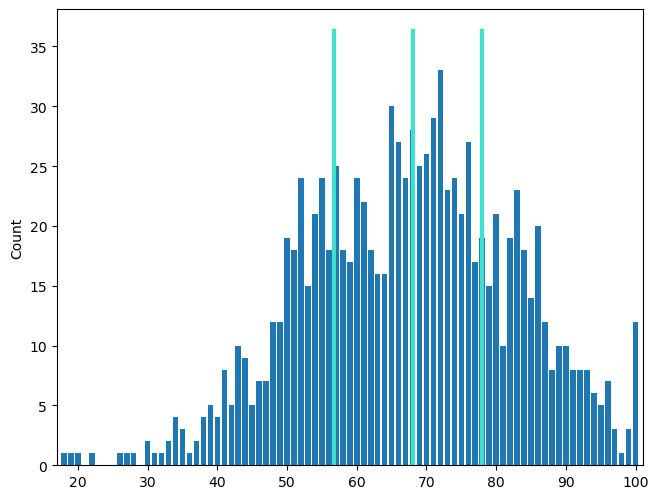

In [20]:
h = np.bincount(p, minlength=100) # the score is in the range 0-100 so there are 101 numbers
x = np.arange(101)
plt.bar(x,h, width=0.8*(x[1]-x[0]))
n = 1.1 * h.max()
for i in range(3):
    plt.plot([q[i+1],q[i+1]], [0,n], linewidth=3, color = '#40E0D0')
plt.xlim((p.min()-1, p.max()+1))
plt.ylabel("Count")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

As shown in here, the quartiles separate the sample into four groups.

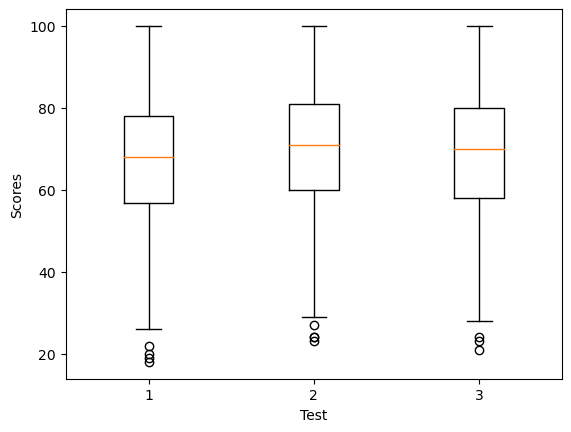

In [21]:
plt.boxplot(d)
plt.xlabel("Test")
plt.ylabel("Scores")
plt.show()

The box shows the *Interquartile Range*(IQR), which means the datas that falls between the first quartile and the third quartile. That is to say, the 50% of data in the middle.

The out stretch lines are called the *whiskers* (or *fliers* in matplotlib). They are 1.5 times the IQR above Q3 or below Q1. That is to say, 1.5 times the length of the IQR region, and find the largest or smallest in that region.

The marked line is the median.

## The Missing Values

Missing values in NumPy are usually denoted as `NaN`.

In [30]:
a = np.arange(10, dtype="float64") # remember to use "" instead of ''
a[3] = np.nan
print(np.isnan(a[3])) # only np.isnan() works
print(a[3]==np.nan)
print(a[3] is np.nan)

True
False
False


In [43]:
N=1000
np.random.seed(73939133)
x=np.zeros((N,4))
x[:,0] = 5*np.random.random(N)
x[:,1] = np.random.normal(10,1,size=N)
x[:,2] = 3*np.random.beta(5,2,N)
x[:,3] = 0.3*np.random.lognormal(size=N)

The 4 dimensions of x are distributed in uniform, normal, beta and log-normal fashion. (log-normal is a function whose log is the normal curve)

In [44]:
i = np.random.randint(0,N, size=int(0.05*N))
x[i,0] = np.nan
i = np.random.randint(0,N, size=int(0.05*N))
x[i,1] = np.nan
i = np.random.randint(0,N, size=int(0.05*N))
x[i,2] = np.nan
i = np.random.randint(0,N, size=int(0.05*N))
x[i,3] = np.nan


5% of null value mean you cannot just throw the objects with null away. However, we can replace them with either the mean or median of the data. Choosing the median or mean depends on the underlying distribution.

NaNs present


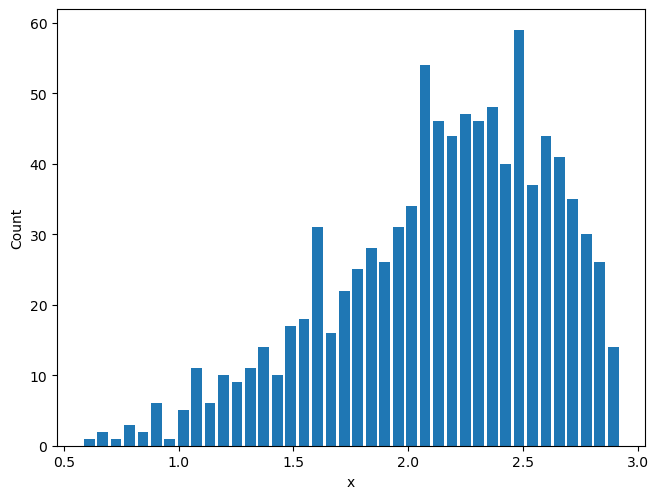

non-NaN mean, std =  2.169986269563819 0.4745140140980093
updated mean, std =  2.173269045427578 0.4629566451638146


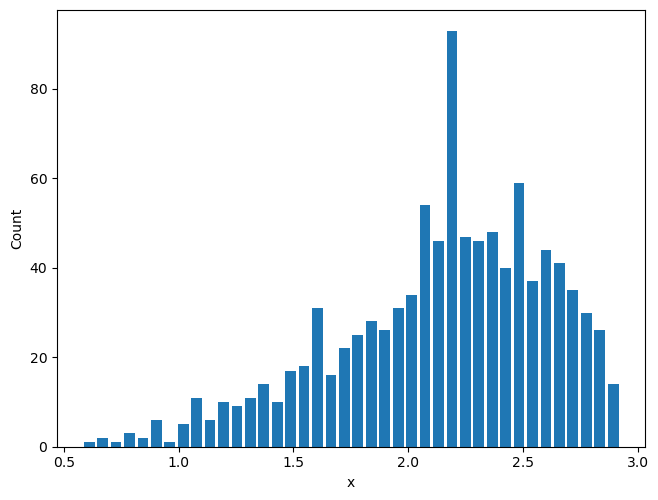

In [48]:
if (np.isnan(x[:,2]).sum() != 0):
    print("NaNs present")
    i = np.where(np.isnan(x[:,2]) == False)
    z = x[i,2]
    mn,md,s = z.mean(), np.median(z), z.std(ddof=1)
    hh,xx = np.histogram(z, bins=40)
    plt.bar(xx[:-1],hh, width=0.8*(xx[1]-xx[0]))
    plt.xlabel("x")
    plt.ylabel("Count")
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    plt.savefig("missing_feature_2_plot.png", dpi=300)
    plt.show()
    plt.close()

    i = np.where(np.isnan(x[:,2]) == True)
    x[i,2] = md  # replace w/median

    print("non-NaN mean, std = ", z.mean(), z.std(ddof=1))
    print("updated mean, std = ", x[:,2].mean(), x[:,2].std(ddof=1))

    hh,xx = np.histogram(x[:,2], bins=40)
    plt.bar(xx[:-1],hh, width=0.8*(xx[1]-xx[0]))
    plt.xlabel("x")
    plt.ylabel("Count")
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    plt.savefig("missing_feature_2_updated_plot.png", dpi=300)
    plt.show()
    plt.close()

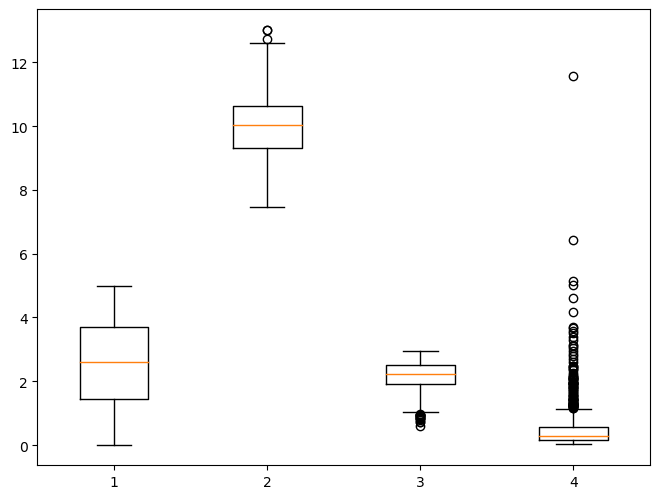

In [49]:
#  Do the same to the others
i = np.where(np.isnan(x[:,0]) == False)
m = np.median(x[i,0])
i = np.where(np.isnan(x[:,0]) == True)
x[i,0] = m

i = np.where(np.isnan(x[:,1]) == False)
m = np.median(x[i,1])
i = np.where(np.isnan(x[:,1]) == True)
x[i,1] = m

i = np.where(np.isnan(x[:,3]) == False)
m = np.median(x[i,3])
i = np.where(np.isnan(x[:,3]) == True)
x[i,3] = m

plt.boxplot(x)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("missing_updated_box_plot.png", dpi=300)
plt.show()
plt.close()